In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
from scipy import stats
import re
import nltk
import math
import pickle
import statsmodels as sm

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_val_predict,KFold
from sklearn.metrics import roc_auc_score


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

### Develop a logistic regression model to predict whether or not it will rain tomorrow.

In [2]:
#df = pd.read_csv('weather_AUS_cleaned.csv')
df = pd.read_csv('weather_AUS_cleaned-2.csv')

In [3]:
df.shape

(131584, 293)

In [4]:
df.dtypes

MinTemp            float64
MaxTemp            float64
Rainfall           float64
Evaporation        float64
Sunshine           float64
WindGustSpeed      float64
WindSpeed9am       float64
WindSpeed3pm       float64
Humidity9am        float64
Humidity3pm        float64
Pressure9am        float64
Pressure3pm        float64
Cloud9am           float64
Cloud3pm           float64
Temp9am            float64
Temp3pm            float64
RainTomorrow         int64
month                int64
day                  int64
year                 int64
MinTemp_IQR        float64
MinTemp_lower      float64
MinTemp_upper      float64
MaxTemp_IQR        float64
MaxTemp_lower      float64
MaxTemp_upper      float64
Rainfall_IQR       float64
Rainfall_lower     float64
Rainfall_upper     float64
Evaporation_IQR    float64
                    ...   
WindDir9am_ENE       int64
WindDir9am_ESE       int64
WindDir9am_N         int64
WindDir9am_NE        int64
WindDir9am_NNE       int64
WindDir9am_NNW       int64
W

In [5]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.598361,0.600000,0.025862,0.41426,0.524909,0.569231,0.571429,0.615385,0.707071,0.212121,...,0,0,0,0,0,0,0,0,1,0
1,0.434426,0.648889,0.000000,0.41426,0.524909,0.569231,0.114286,0.564103,0.434343,0.242424,...,0,0,0,0,0,0,0,0,0,1
2,0.584699,0.662222,0.000000,0.41426,0.524909,0.600000,0.542857,0.666667,0.373737,0.292929,...,0,0,0,0,0,0,0,0,0,1
3,0.483607,0.713333,0.000000,0.41426,0.524909,0.261538,0.314286,0.230769,0.444444,0.151515,...,0,0,0,0,0,0,0,0,0,0
4,0.710383,0.808889,0.043103,0.41426,0.524909,0.523077,0.200000,0.512821,0.818182,0.323232,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# create features data,X , to predict the target, RainTomorrow
# X = df.drop(['RainTomorrow'],axis=1).values
# y = df['RainTomorrow'].values

X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

print(X.shape)
print()
print(y.shape)

(131584, 292)

(131584,)


In [7]:
print('RainTomorrow' in X.columns)

False


In [8]:
y.value_counts()

0    104586
1     26998
Name: RainTomorrow, dtype: int64

In [9]:
# split the data into training & test data with test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=4)
print(X_train.shape)
print()
print(X_test.shape)

(105267, 292)

(26317, 292)


### 1. Develop a logistic regression model with an arbitrary random_state.

In [10]:
# instantiate Logistic Regression classifier
lr = LogisticRegression(random_state=0)


### 2. Train the model with the prepared training features and labels.

In [11]:
lr.fit(X_train, y_train)


/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

### 3. Predict the next day’s rain forecast for the prepared testing data.

### Calculate the probabilities for negative and positive classes.

In [12]:
predict_prob = lr.predict_proba(X_test)
print()
print(type(predict_prob))
print()
print(predict_prob.shape)
print()
print(predict_prob)
print()


<class 'numpy.ndarray'>

(26317, 2)

[[9.96320361e-01 3.67963858e-03]
 [9.99457739e-01 5.42261241e-04]
 [2.97196622e-01 7.02803378e-01]
 ...
 [9.99012426e-01 9.87574447e-04]
 [9.99383416e-01 6.16583730e-04]
 [5.98834184e-02 9.40116582e-01]]



In [13]:
predictions = lr.predict(X_test)
print(predictions[100])
print()
print(predict_prob[100,])

1

[0.06381635 0.93618365]


In [14]:
print(predictions[0])
print()
print(predict_prob[0,])

0

[0.99632036 0.00367964]


In [15]:
print(predictions[1000])
print()
print(predict_prob[1000,])

0

[0.99789148 0.00210852]


### 4. Calculate the accuracy score of the model for the predicted results.

In [16]:
print("Logistic Regression Accuracy Score: {:.2f}".format(lr.score(X_test, y_test)))
print()

Logistic Regression Accuracy Score: 0.94



In [17]:
# Generate Confusion Matrix for Model
actual = y_test
predictions = lr.predict(X_test)
print('Confusion Matrix for Model')
print()
cm = confusion_matrix(actual,predictions)
print(cm)

Confusion Matrix for Model

[[20317   632]
 [  903  4465]]


Text(0.5, 1.0, 'Confusion Matrix')

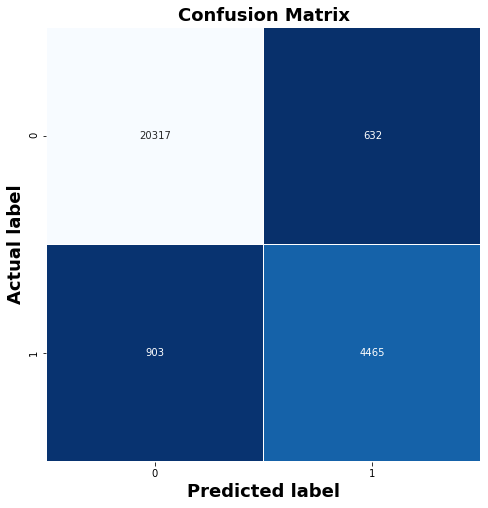

In [18]:
# Confusion matrix 

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r',cbar=None);
plt.ylabel('Actual label',fontsize=18,fontweight='bold');
plt.xlabel('Predicted label',fontsize=18, fontweight='bold');

plt.title('Confusion Matrix', fontsize = 18,fontweight='bold')

In [19]:
# try optimizing Logistic Regression model for better accuracy on test data
#the grid of parameters to search over
Cs = [0.001,0.01, 0.1, 1, 10, 100]

Scores = []
for item in Cs:
    clf = LogisticRegression(C=item,random_state=0)
    clf.fit(X_train, y_train)
    print(item)
    print(clf.score(X_test, y_test))
    print()
    Scores.append(clf.score(X_test, y_test))

for score in Scores:
    print(score)
    
print()    
print(max(Scores))



/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.001
0.9210396321769199



/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.01
0.9350229889425087



/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.1
0.9538701219743891



/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1
0.9416726830565794



/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


10
0.9502602880267508

100
0.9528821674202986

0.9210396321769199
0.9350229889425087
0.9538701219743891
0.9416726830565794
0.9502602880267508
0.9528821674202986

0.9538701219743891


/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# select optimized C value for accuracy
max_score_index = Scores.index(max(Scores))
print(max_score_index)
C_op = Cs[max_score_index]
print()
print(C_op)
print()

2

0.1



In [21]:
# optimize logistic regression model with optimized C value
lr_op = LogisticRegression(C= C_op,random_state=0)

lr_op.fit(X_train, y_train)

print("Optimized Logistic Regression Model Accuracy Score: {:.2f}".format(lr_op.score(X_test, y_test)))
print()

Optimized Logistic Regression Model Accuracy Score: 0.95



/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 5. Interpret the model results by checking feature importance:

### Check the learned weights for each feature.
### Check the bias term.

In [22]:
# https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
#coefs = np.concatenate([lr_op.intercept_, lr_op.coef_[0]])
coefs = lr_op.coef_[0]
bias = lr_op.intercept_

In [23]:
print('the learned weights for each feature')
print(coefs[0:10])

the learned weights for each feature
[ 0.03008515 -0.01153847  0.13550388  0.00052159  0.00358384  0.1486106
 -0.09332121 -0.09916697  0.04913433  0.26286062]


In [24]:
print(bias)

[-1.94974039e-05]


### Bias = -1.94974039e-05

In [25]:
print(X.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=292)


In [26]:
coef_dict = {}
for coef, feat in zip(coefs, X.columns):
    coef_dict[feat] = coef

In [27]:
print(list(zip(coefs, X.columns))[0:20])


[(0.030085147425173965, 'MinTemp'), (-0.011538473102132726, 'MaxTemp'), (0.13550387832754132, 'Rainfall'), (0.0005215901172394303, 'Evaporation'), (0.003583843148570451, 'Sunshine'), (0.1486105955868708, 'WindGustSpeed'), (-0.09332120801149353, 'WindSpeed9am'), (-0.09916696613848451, 'WindSpeed3pm'), (0.04913433193841417, 'Humidity9am'), (0.2628606223872348, 'Humidity3pm'), (0.013117619771262776, 'Pressure9am'), (-0.03611691052307184, 'Pressure3pm'), (-0.15774815408637619, 'Cloud9am'), (-0.00862147788215981, 'Cloud3pm'), (0.031912013771014894, 'Temp9am'), (-0.023510675882997024, 'Temp3pm'), (0.024567616660935, 'month'), (-0.00011132621000856167, 'day'), (0.03891092200823914, 'year'), (-0.00017730509270487448, 'MinTemp_IQR')]


In [28]:
# https://careerkarma.com/blog/python-sort-a-dictionary-by-value/
sorted_coefs = sorted(coef_dict.items(), key=lambda x: x[1],reverse=True)
sorted_coefs.pop(0)

for idx in sorted_coefs:
    print(idx[0], idx[1])

Humidity3pm_zscore 1.2712634917358074
Humidity3pm_zscore.1 1.2712634917358074
WindGustSpeed_zscore 0.7364064220448614
WindGustSpeed_zscore.1 0.7364064220448614
Rainfall_zscore 0.37503745290945767
Rainfall_zscore.1 0.37503745290945767
Humidity3pm 0.2628606223872348
Humidity3pm.1 0.2628606223872348
Humidity9am_zscore 0.25805880605547116
Humidity9am_zscore.1 0.25805880605547116
Temp9am_zscore 0.1984958526436849
Temp9am_zscore.1 0.1984958526436849
WindDir9am_N 0.18534993164721214
MinTemp_zscore 0.17303906195655228
MinTemp_zscore.1 0.17303906195655228
WindGustSpeed 0.1486105955868708
WindGustSpeed.1 0.1486105955868708
Rainfall 0.13550387832754132
Rainfall.1 0.13550387832754132
WindDir9am_NNE 0.13040765365539642
WindDir3pm_NW 0.11443278674424515
WindDir3pm_N 0.1111415494322226
WindDir3pm_NNW 0.1069802832779567
Pressure9am_zscore 0.10187057967229475
Pressure9am_zscore.1 0.10187057967229475
Location_Witchcliffe 0.09301759249633494
WindGustDir_N 0.08120191190920842
WindGustDir_NW 0.080254759930

Cloud9am -0.15774815408637619
Cloud9am.1 -0.15774815408637619
Pressure3pm_zscore -0.28009833976882453
Pressure3pm_zscore.1 -0.28009833976882453
WindSpeed9am_zscore -0.3685767009291653
WindSpeed9am_zscore.1 -0.3685767009291653
WindSpeed3pm_zscore -0.44365575656580986
WindSpeed3pm_zscore.1 -0.44365575656580986
Cloud9am_zscore -0.6266105282424761
Cloud9am_zscore.1 -0.6266105282424761


In [29]:
# print(type(sorted_coefs))

In [30]:
for item in sorted_coefs[0:90]:
    print(item)

('Humidity3pm_zscore', 1.2712634917358074)
('Humidity3pm_zscore.1', 1.2712634917358074)
('WindGustSpeed_zscore', 0.7364064220448614)
('WindGustSpeed_zscore.1', 0.7364064220448614)
('Rainfall_zscore', 0.37503745290945767)
('Rainfall_zscore.1', 0.37503745290945767)
('Humidity3pm', 0.2628606223872348)
('Humidity3pm.1', 0.2628606223872348)
('Humidity9am_zscore', 0.25805880605547116)
('Humidity9am_zscore.1', 0.25805880605547116)
('Temp9am_zscore', 0.1984958526436849)
('Temp9am_zscore.1', 0.1984958526436849)
('WindDir9am_N', 0.18534993164721214)
('MinTemp_zscore', 0.17303906195655228)
('MinTemp_zscore.1', 0.17303906195655228)
('WindGustSpeed', 0.1486105955868708)
('WindGustSpeed.1', 0.1486105955868708)
('Rainfall', 0.13550387832754132)
('Rainfall.1', 0.13550387832754132)
('WindDir9am_NNE', 0.13040765365539642)
('WindDir3pm_NW', 0.11443278674424515)
('WindDir3pm_N', 0.1111415494322226)
('WindDir3pm_NNW', 0.1069802832779567)
('Pressure9am_zscore', 0.10187057967229475)
('Pressure9am_zscore.1', 

### Humidity3pm, Humidity9am, WindGustSpeed, Rainfall are useful predictors in predicting rain tomorrow

In [31]:
# https://careerkarma.com/blog/python-sort-a-dictionary-by-value/
sorted_coefs = sorted(coef_dict.items(), key=lambda x: x[1],reverse=True)
sorted_coefs.pop(0)


('RainTomorrow.1', 5.859916546175013)

In [32]:
#my_cols = []
#for item in sorted_coefs[0:5]:
    #my_cols.append(item[0])

In [33]:
#print(my_cols)

In [34]:
# create a mininmalistic Logistic Regression model with few features to predict rain tomorrow
#my_cols = ['Humidity3pm','Humidity9am','WindGustSpeed', 'Rainfall','Pressure9am']
my_cols = ['Humidity3pm','Humidity9am','WindGustSpeed', 'Rainfall','Pressure9am','Pressure3pm']
#my_cols = ['Humidity3pm','Humidity9am','WindGustSpeed', 'Rainfall','Pressure9am','WindDir9am_NNE']
#my_cols = ['Humidity3pm','Humidity9am','Rainfall']
#my_cols = ['Humidity3pm','Rainfall']
X2 = df[my_cols]
y = df['RainTomorrow']

In [35]:
X2.head()

,Humidity3pm,Humidity9am,WindGustSpeed,Rainfall,Pressure9am,Pressure3pm
0,0.212121,0.707071,0.569231,0.025862,0.488506,0.520309
1,0.242424,0.434343,0.569231,0.000000,0.544061,0.533849
2,0.292929,0.373737,0.600000,0.000000,0.486590,0.551257
3,0.151515,0.444444,0.261538,0.000000,0.678161,0.630561
4,0.323232,0.818182,0.523077,0.043103,0.547893,0.499033


In [36]:
# split the data into training & test data with test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X2, y,test_size=0.20, random_state=4)
print(X_train.shape)
print()
print(X_test.shape)
print()
print(y_train.shape)
print()
print(y_test.shape)

(105267, 6)

(26317, 6)

(105267,)

(26317,)


In [37]:
lr_3 = LogisticRegression(C= C_op,random_state=0)

lr_3.fit(X_train, y_train)

print("Minimalistic Logistic Regression Model Accuracy Score: {:.3f}".format(lr_3.score(X_test, y_test)))
print()

Minimalistic Logistic Regression Model Accuracy Score: 0.841



## Confusion Matrix for Minimalistic Logistic Regression model

Text(0.5, 1.0, 'Confusion Matrix for Model with 6 Predictors')

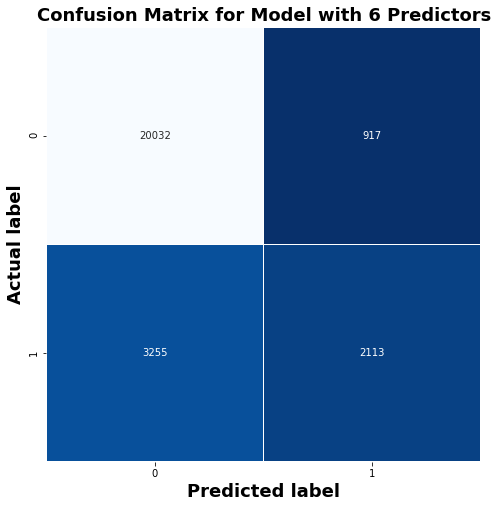

In [38]:
# Generate Confusion Matrix for Model
actual_2 = y_test
predictions_2 = lr_3.predict(X_test)

cm_2 = confusion_matrix(actual_2,predictions_2)

# plot the matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r',cbar=None);

plt.ylabel('Actual label',fontsize=18,fontweight='bold');
plt.xlabel('Predicted label',fontsize=18, fontweight='bold');
plt.title('Confusion Matrix for Model with 6 Predictors', fontsize = 18,fontweight='bold')

### You can build a Logistic Regression Model using only 6 numerical features to predict rain tomorrow and achieve accuracy of  ~84%

### ROC Curve

In [39]:
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# predict probabilities
lr_probs = lr_3.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [40]:
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

Logistic Regression: ROC AUC=0.836


### area under curve (AUC) score for this logistic regression model using only 6 numerical predictors is 0.84

In [41]:
# no skill model: always predicts no rain,0
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))

No Skill: ROC AUC=0.500


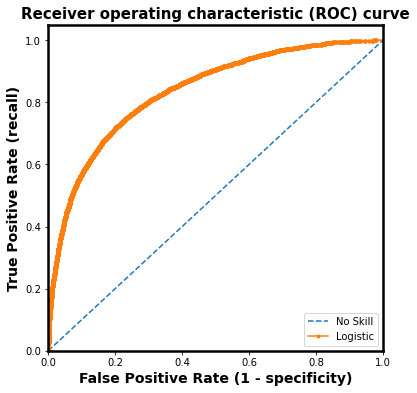

In [42]:
# calculate roc curves
# https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

fig, ax = plt.subplots(figsize=(6,6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate (recall)', fontsize=14,fontweight='bold')
plt.title('Receiver operating characteristic (ROC) curve',fontsize=15,fontweight='bold')
plt.legend(loc="lower right")

### K Fold Cross Validation

In [44]:
# create a mininmalistic Logistic Regression model with few features to predict rain tomorrow
#my_cols = ['Humidity3pm','Humidity9am','WindGustSpeed', 'Rainfall','Pressure9am']
my_cols = ['Humidity3pm','Humidity9am','WindGustSpeed', 'Rainfall','Pressure9am','Pressure3pm']
#my_cols = ['Humidity3pm','Humidity9am','Rainfall']
#my_cols = ['Humidity3pm','Rainfall']
X2 = df[my_cols]
y = df['RainTomorrow']

In [45]:
# split the data into training & test data with test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X2, y,test_size=0.20, random_state=4)

In [46]:
# https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression(C= C_op,random_state=0)
# evaluate model
scores = cross_val_score(model, X2, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Accuracy: 0.841 (0.002)


In [47]:
print(scores)

[0.84432116 0.83995136 0.84230725 0.8391534  0.84135127]


### statsmodel Logistic Regression

In [48]:
# https://www.datasklr.com/logistic-regression/multinomial-logistic-regression
# statsmodel Logistic Regression
import statsmodels.api as sm

In [49]:
model = sm.Logit(y_train, X_train)
model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.387574
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:               105267
Model:                          Logit   Df Residuals:                   105261
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2369
Time:                        13:08:38   Log-Likelihood:                -40799.
converged:                       True   LL-Null:                       -53465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Humidity3pm       5.7461      0.062     93.090      0.000       5.625       5.867
Humidity9am      -0.

In [50]:
# include an intercept with the fitting 
model2 = sm.Logit(y_train,sm.add_constant(X_train))
model2_fit = model2.fit()

print(model2_fit.summary())

Optimization terminated successfully.
         Current function value: 0.370999
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:               105267
Model:                          Logit   Df Residuals:                   105260
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2695
Time:                        13:08:38   Log-Likelihood:                -39054.
converged:                       True   LL-Null:                       -53465.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.8692      0.085    -57.087      0.000      -5.036      -4.702
Humidity3pm       6.

### The p-values for all 6 predictor variables are less than 0.05 : 
### there is a statistically significant association between the target variable, RainTomorrow
### and each predictor variable.

#### The predictor variables Humidity3pm, Humidity9am, WindGustSpeed, Rainfall, Pressure9am, Pressure3pm
####  are useful in predicting Rain Tomorrow

In [51]:
print(model2_fit.params)
print(type(model2_fit.params))
print(model2_fit.params.index)


const           -4.869230
Humidity3pm      6.233332
Humidity9am      0.882989
WindGustSpeed    2.815485
Rainfall         1.413455
Pressure9am      5.734931
Pressure3pm     -9.044243
dtype: float64
<class 'pandas.core.series.Series'>
Index(['const', 'Humidity3pm', 'Humidity9am', 'WindGustSpeed', 'Rainfall',
       'Pressure9am', 'Pressure3pm'],
      dtype='object')


### Interpreting Logistic Regression model coefficients

### Each coefficient measures how an increase of each feature by one unit affects the log of odds

### Exponentiate each coefficient to determine how the odds changes with an increase of one unit for each feature

In [52]:
# calculate exp of each param to obtain the ratio of odds, p/1 -p ,for each param
for item in model2_fit.params:
    print(np.exp(item))

0.007679276937603981
509.45020170173984
2.4181175226916993
16.701280713438894
4.110132797586861
309.49156972846475
0.00011806879908830564


### for an increase of humidity at 3pm by one unit, the odds for rain increases by 507

In [53]:
# https://sweetcode.io/easy-scikit-logistic-regression/
# Interpretation of the Humidity3pm coefficient
print((np.exp(-4.86)+np.exp(6.23*41)) / (np.exp(-4.86)+np.exp(6.23*40)))

507.7554834957885


### for an increase of one unit of humidity at 9 am the odds for rain increases by 2.4

In [54]:
# Interpretation of the Humidity9am coefficient
print((np.exp(-4.86)+np.exp(0.88*41)) / (np.exp(-4.86)+np.exp(0.88*40)))

2.410899706417199


### for each increase of one unit of wind gust speed the odds for rain increases by 16.7

In [57]:
# Interpretation of the WindGustSpeed coefficient
print((np.exp(-4.86)+np.exp(2.815*41)) / (np.exp(-4.86)+np.exp(2.815*40)))

16.693175780331273
